# Lab 14 Prep

#### In place of lab this week, follow along in lecture (or on the recorded video) to practice some text analytics concepts in Python

In [86]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [87]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [88]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [89]:
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [90]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer 
from nltk import word_tokenize

### Load datasets

In [92]:
tweets = pd.read_csv("Tweets.csv", sep=",", encoding="utf-8")

tweets.info()

display(tweets.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [93]:
movies = pd.read_csv("IMDB_sample.csv", sep=",", encoding="utf-8")

movies.info()

display(movies.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7501 non-null   int64 
 1   review      7501 non-null   object
 2   label       7501 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 175.9+ KB


,Unnamed: 0,review,label
0,18245,This short spoof can be found on Elite's Mille...,0
1,19801,A singularly unfunny musical comedy that artif...,0
2,3222,"An excellent series, masterfully acted and dir...",1
3,6010,The master of movie spectacle Cecil B. De Mill...,1
4,16355,I was gifted with this movie as it had such a ...,0
5,23988,"A propaganda film for the Palestinian ""cause""....",0
6,9970,Sure Star Wars (a movie I have seen at least f...,1
7,9144,To all the haters out there: condemning a TV s...,1
8,9450,I saw the long day's dying when it first came ...,1
9,16174,Sorry to go against the flow but I thought thi...,0


In [94]:
movies.drop('Unnamed: 0', axis=1, inplace=True)

In [95]:
# Proportion of positive vs. negative tweets:
# Find the number of positive and negative reviews
print('Number of positive and negative reviews: ', movies.label.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', movies.label.value_counts() / len(movies))

Number of positive and negative reviews:  label
0    3782
1    3719
Name: count, dtype: int64
Proportion of positive and negative reviews:  label
0    0.504199
1    0.495801
Name: count, dtype: float64


# 1) What is the proportion of positive/negative/neutral for airline tweets?

In [97]:
print('Number of positive and negative reviews: ', tweets.airline_sentiment.value_counts())

# Find the proportion of positive and negative reviews
print('Proportion of positive and negative reviews: ', tweets.airline_sentiment.value_counts() / len(tweets))

Number of positive and negative reviews:  airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64
Proportion of positive and negative reviews:  airline_sentiment
negative    0.626913
neutral     0.211680
positive    0.161407
Name: count, dtype: float64


# 2) Let's add columns to our movies dataframe for each review (to use later)

In [99]:
def count_words(text):
    return len(text.split())

In [100]:
length_reviews = movies.review.str.len()

movies['characters'] = length_reviews
movies['words'] = movies['review'].apply(count_words)

In [101]:
movies

,review,label,characters,words
0,This short spoof can be found on Elite's Mille...,0,667,127
1,A singularly unfunny musical comedy that artif...,0,2982,513
2,"An excellent series, masterfully acted and dir...",1,669,104
3,The master of movie spectacle Cecil B. De Mill...,1,691,116
4,I was gifted with this movie as it had such a ...,0,1087,193
...,...,...,...,...
7496,Although this film is somewhat filled with eig...,1,633,128
7497,Bo Derek's beauty and John Derek's revolutiona...,1,650,112
7498,I have seen every episode of this spin off. I ...,0,654,112
7499,"A comedy gem. Lots of laugh out loud moments, ...",1,918,171


# Let's make a word cloud of the movie reviews

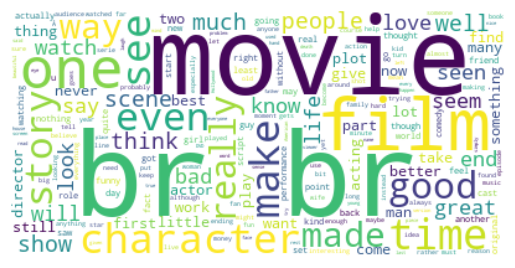

In [103]:
# Import the word cloud function 
from wordcloud import WordCloud 
my_stopwords = set(STOPWORDS)
all_text = ' '.join(movies['review'])
# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(all_text)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

# Get rid of movie, film and br (add to Stopwords list)

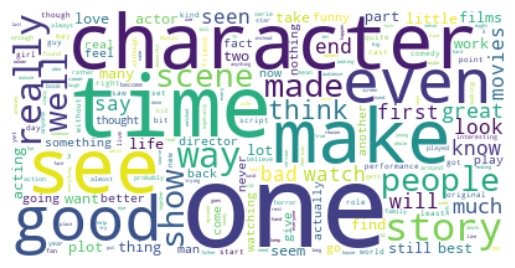

In [105]:
custom_stopwords = {'film', 'br', 'movie'}
my_stopwords.update(custom_stopwords)
# Import the word cloud function 
from wordcloud import WordCloud 
all_text = ' '.join(movies['review'])
# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(all_text)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

# 3) Create a word cloud from the airline tweets data (hoping not too many curse words!). Use common stopwords

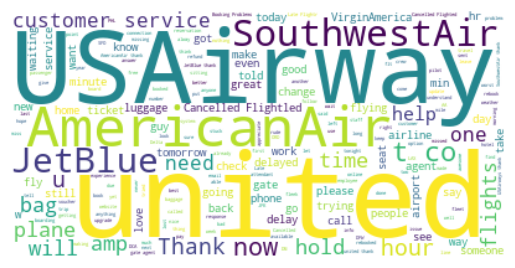

In [107]:
custom_stopwords = {'suicide', 'really', 'flight'}
my_stopwords.update(custom_stopwords)
# Import the word cloud function 
from wordcloud import WordCloud 
all_text = ' '.join(tweets['text'])
# Create and generate a word cloud image
my_cloud = WordCloud(background_color='white', stopwords=my_stopwords).generate(all_text)

# Display the generated wordcloud image
plt.imshow(my_cloud, interpolation='bilinear') 
plt.axis("off")

# Don't forget to show the final image
plt.show()

In [108]:
text_2 = "It was the best of times, it was the worst of times."

In [109]:
# Create a textblob object  
blob_two_cities = TextBlob(text_2)

# Print out the sentiment 
print(blob_two_cities.sentiment)

Sentiment(polarity=0.0, subjectivity=0.65)


# 4) Let's test it out with our movie data and each review. We'll add 2 columns to our dataframe

In [111]:
#Assign a polarity and sentiment score to each review. Save those scores in 2 new columns in the dataframe

def get_sentiment(row):
    sent = TextBlob(row['review'])
    return sent.sentiment
    

movies[['polarity', 'subjectivity']] = movies.apply(get_sentiment, axis=1, result_type='expand')


In [112]:
display(movies.head())

,review,label,characters,words,polarity,subjectivity
0,This short spoof can be found on Elite's Mille...,0,667,127,-0.096667,0.548333
1,A singularly unfunny musical comedy that artif...,0,2982,513,0.187243,0.504024
2,"An excellent series, masterfully acted and dir...",1,669,104,0.270166,0.608120
3,The master of movie spectacle Cecil B. De Mill...,1,691,116,0.157833,0.615333
4,I was gifted with this movie as it had such a ...,0,1087,193,0.133519,0.551626


# 5) Bag of Words

In [114]:
from sklearn.feature_extraction.text import CountVectorizer #already imported above but will use here

In [115]:
# Build the vectorizer, specify max features 
vect = CountVectorizer(max_features=100)
# Fit the vectorizer
vect.fit(movies.review)

# Transform the review column
X_review = vect.transform(movies.review)

# Create the bow representation
X_df = pd.DataFrame(X_review.toarray(), columns=vect.vocabulary_.keys())

In [116]:
X_df

,this,can,be,on,of,the,good,to,as,would,...,she,bad,because,about,people,them,two,think,movies,into
0,0,0,0,0,0,1,0,0,2,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,3,1,1,11,0,3,3,4,...,0,0,1,1,2,0,2,7,2,3
2,0,1,0,0,1,7,0,1,2,1,...,0,0,0,0,0,0,0,2,0,0
3,0,0,0,0,2,1,0,1,2,2,...,1,0,0,0,0,1,0,0,0,1
4,0,0,3,0,0,8,0,3,1,0,...,2,1,0,1,1,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,0,0,1,0,0,4,0,0,0,3,...,0,0,0,0,0,1,0,1,1,3
7497,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
7498,0,0,0,0,0,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7499,0,0,1,0,1,8,0,2,0,0,...,1,0,0,0,3,0,1,2,0,0


# Stemming - here we cut down on the ending of words

In [118]:
# Import the function to perform stemming
from nltk.stem import PorterStemmer
# combine all  text into a single string
all_text = ' '.join(tweets['text'])

# Call the stemmer
porter = PorterStemmer()

# split the text into individual words and remove stopwords
all_words = [word for word in all_text.split() if word not in STOPWORDS]
# Stem the list of tokens
stemmed_tokens = [porter.stem(word) for word in all_words] 
# Print the first element of the list
print(stemmed_tokens[0:100])

['@virginamerica', 'what', '@dhepburn', 'said.', '@virginamerica', 'plu', 'ad', 'commerci', 'experience...', 'tacky.', '@virginamerica', 'i', 'today...', 'must', 'mean', 'i', 'need', 'take', 'anoth', 'trip!', '@virginamerica', 'realli', 'aggress', 'blast', 'obnoxi', '"entertainment"', "guests'", 'face', '&amp;', 'littl', 'recours', '@virginamerica', 'realli', 'big', 'bad', 'thing', '@virginamerica', 'serious', 'pay', '$30', 'flight', 'seat', 'playing.', 'realli', 'bad', 'thing', 'fli', 'va', '@virginamerica', 'yes,', 'nearli', 'everi', 'time', 'i', 'fli', 'vx', '“ear', 'worm”', 'won’t', 'go', 'away', ':)', '@virginamerica', 'realli', 'miss', 'prime', 'opportun', 'men', 'without', 'hat', 'parody,', 'there.', 'https://t.co/mwpg7grezp', '@virginamerica', 'well,', 'i', "didn't…but", 'now', 'i', 'do!', ':-d', '@virginamerica', 'amazing,', 'arriv', 'hour', 'early.', "you'r", 'good', 'me.', '@virginamerica', 'know', 'suicid', 'second', 'lead', 'caus', 'death', 'among', 'teen', '10-24', '@virg

# Let's try with TFIDF - Term Frequency Inverse Doc Frequency

In [120]:
# Import the required packages
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Build a BOW and tfidf vectorizers from the review column and with max of 100 features
#vect1 = CountVectorizer(max_features=100).fit(movies.review)
vect2 = TfidfVectorizer(max_features=100).fit(movies.review)

# Transform the vectorizers
#X1 = vect1.transform(movies.review)
X2 = vect2.transform(movies.review)
# Create DataFrames from the vectorizers
#X_df1 = pd.DataFrame(X1.toarray(), columns=vect1.vocabulary_.keys())
X_df2 = pd.DataFrame(X2.toarray(), columns=vect2.vocabulary_.keys())
#print('Top 5 rows, using BOW: \n', X_df1.head())
print('Top 5 rows using tfidf: \n', X_df2.head())

Top 5 rows using tfidf: 
    this       can        be        on        of       the  good        to  \
0   0.0  0.000000  0.000000  0.000000  0.000000  0.050874   0.0  0.000000   
1   0.0  0.000000  0.085970  0.041104  0.029862  0.197978   0.0  0.083278   
2   0.0  0.157156  0.000000  0.000000  0.108897  0.459439   0.0  0.101231   
3   0.0  0.000000  0.000000  0.000000  0.213837  0.064441   0.0  0.099392   
4   0.0  0.000000  0.174748  0.000000  0.000000  0.292672   0.0  0.169276   

         as     would  ...       she       bad   because     about    people  \
0  0.141213  0.000000  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.074937  0.116729  ...  0.000000  0.000000  0.033452  0.035225  0.076804   
2  0.182184  0.106421  ...  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.178873  0.208974  ...  0.137860  0.000000  0.000000  0.000000  0.000000   
4  0.050774  0.000000  ...  0.156529  0.080826  0.000000  0.071600  0.078059   

      them       two     think

In [121]:
# Import the logistic regression
from sklearn.linear_model import LogisticRegression

# Define the vector of targets and matrix of features
y = movies['label']
X = movies.drop(['review','label'], axis =1)

# Build a logistic regression model and calculate the accuracy
log_reg = LogisticRegression().fit(X,y)
print('Accuracy of logistic regression: ', log_reg.score(X, y))

Accuracy of logistic regression:  0.7600319957339021


# Do the above with an 80/20 train-test split and logistic regression. Is your accuracy score higher or lower?

In [123]:
# Import the required packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)
print("Accuracy on 80/20 test split:", test_accuracy)

Accuracy on 80/20 test split: 0.7768154563624251


### 80/20 test split is higher than the logestic regression test --> more accurate